<a href="https://colab.research.google.com/github/dacasfilipe/horta_inteligente_iot/blob/main/Horta_Inteligente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUTORIAL PARA CONSTRUIR A HORTA INTELIGENTE

objetivo: Este tutorial tem como objetivo mostrar a etapas de construção de uma horta inteligente, com sistema automatizado de irrigação controlado por uma placa arduino.

Índice:

1. Materiais necessários
2. Programas necessários
3. Projeto elétrico

# 1. Materiais Necessários

*   01 - placa arduino Uno
*   01 - fonte de alimentação 5v para arduino
*   01 - cabo usb para programar arduino
*   01 - sensor de umidade do solo
*   01 - relé eletrônico 5v
*   01 - bomba submersa para aquário
*   01 - recipiente para colocar a terra pronta(vaso)
*   01 - recipiente para colocar a água(vaso ou bombona de água)
*   10 - fios jumper macho-femea
*   06 - fios jumper fêmea-fêmea
*   1 metro - mangueira de nível transparente
*   01 - saco de terra pronta


obs: não ligar a bomba d'água sem ela estar submersa em água. Caso ligue a bomba sem ela estar na água a mesma vai queimar.

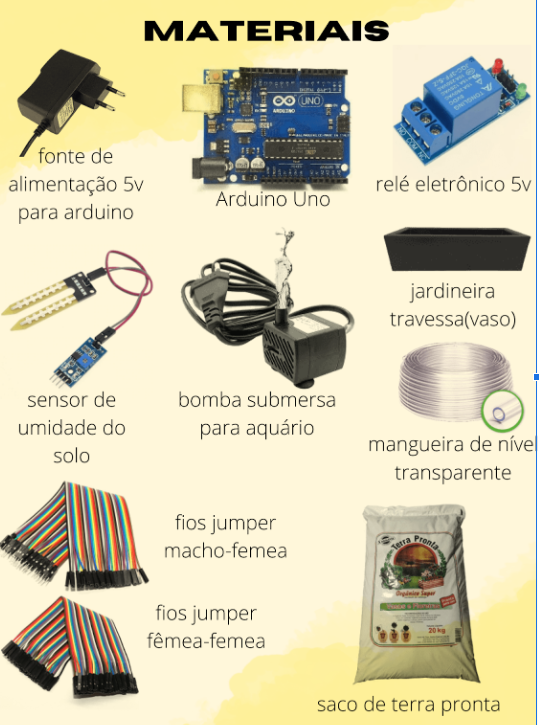

# 2. Programas necessários para instalar no computador
Arduino IDE : https://drive.google.com/file/d/1pDQ_3OH6utoaUiTP56Vwl1f6-QMJOy_s/view?usp=sharing

Programa da horta pronto, este programa do link abaixo é o que utilizamos para a programação da horta. Só pode ser aberto depois de instalado o arduino IDE. Para carregar esse programa é só conectar a placa arduino no USB do computador, abrir o programa e  carregar no arduino.
https://drive.google.com/file/d/1auWeorLa5IfuMSJFpjTEFldEwvLyhwlw/view?usp=sharing

Pasta com arquivos do projeto e drivers arduino:
 https://drive.google.com/drive/folders/1YYuXOxh3o7O0LYN_FROBm6Xbug9fOnCq?usp=sharing


# 3. Projeto Elétrico
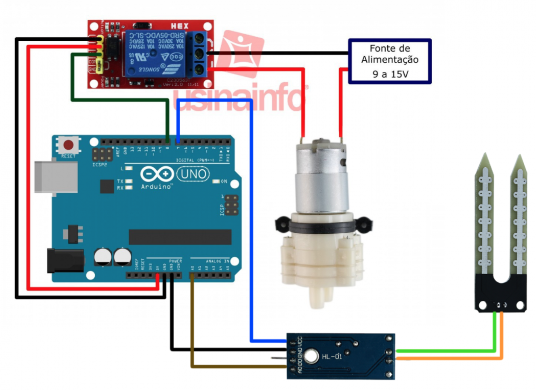




## Temporizador para ligar/Desligar a horta Inteligente
Se você quiser incluir um temporizador para ligar e desligar a irrigação automaticamente, você vai precisar de um módulo de relógio em tempo real (RTC), como o DS3231, para o seu Arduino. Este módulo permitirá que o Arduino conheça o tempo atual.

Eu fornecerei um código que lê a hora atual do módulo RTC e decide se deve ligar ou desligar a irrigação com base nesse horário.

Primeiro, você precisará instalar a biblioteca "RTClib" para o Arduino. Você pode fazer isso através do Gerenciador de Bibliotecas no Arduino IDE.

Aqui está o código modificado:

```C++

In [ ]:
#include <Wire.h>
#include "RTClib.h"

RTC_DS3231 rtc;

#define pinoAnalog A0 // Define o pino A0 como "pinoAnalog"
#define pinoRele 8   // Define o pino 8 como "pinoRele"
#define pino5V 7 // Define o pino 7 como "pino5V"

int ValAnalogIn; // Introduz o valor analógico ao código

// Define o horário de início e término da irrigação
int inicioIrrigacao = 8;  // Hora de iniciar a irrigação (8h da manhã)
int fimIrrigacao = 10;  // Hora de terminar a irrigação (10h da manhã)

void setup() {
  if (! rtc.begin()) {
    Serial.println("Couldn't find RTC");
    while (1);
  }

  if (rtc.lostPower()) {
    Serial.println("RTC lost power, let's set the time!");
    rtc.adjust(DateTime(F(__DATE__), F(__TIME__)));
  }

  Serial.begin(9600); // Declara o BaundRate em 9600
  pinMode(pinoRele, OUTPUT); // Declara o pinoRele como Saída
  pinMode(pino5V, OUTPUT); // Declara o pino5V como Saída
  digitalWrite(pino5V, HIGH); // Põem o pino5V em estado Alto = 5V
}

void loop() {
  DateTime now = rtc.now();

  ValAnalogIn = analogRead(pinoAnalog); // Relaciona o valor analógico com o recebido do sensor
  int Porcento = map(ValAnalogIn, 1023, 0, 0, 100); // Relaciona o valor analógico à porcentagem

  Serial.print(Porcento); // Imprime o valor em Porcento no monitor Serial
  Serial.println("%"); // Imprime o símbolo junto ao valor encontrado

  // Se a porcentagem for maior ou igual à 65 e estiver no horário de irrigação
  if (Porcento >= 65 && now.hour() >= inicioIrrigacao && now.hour() < fimIrrigacao) {
    Serial.println("Planta Irrigada ..."); // Imprime a frase no monitor serial
    digitalWrite(pinoRele, HIGH); // Altera o estado do pinoRele para nível Alto
  } else {
    Serial.println("Irrigando a planta ..."); // Imprime a frase no monitor serial
    digitalWrite(pinoRele, LOW); // Altera o estado do pinoRele para nível Baixo
  }
  delay (1000); // Estabelece o tempo de 1s para reinicial